In [1]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt

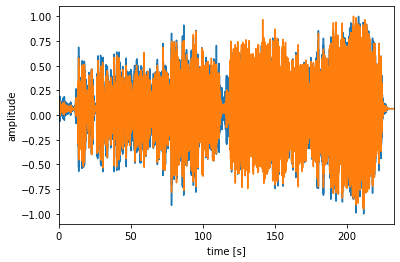

In [2]:
snd = parselmouth.Sound("SpleeterOutputs/5stems/Let It Be_vocals.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

In [7]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    plt.figure(figsize=(40,20))
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

<Figure size 432x288 with 0 Axes>

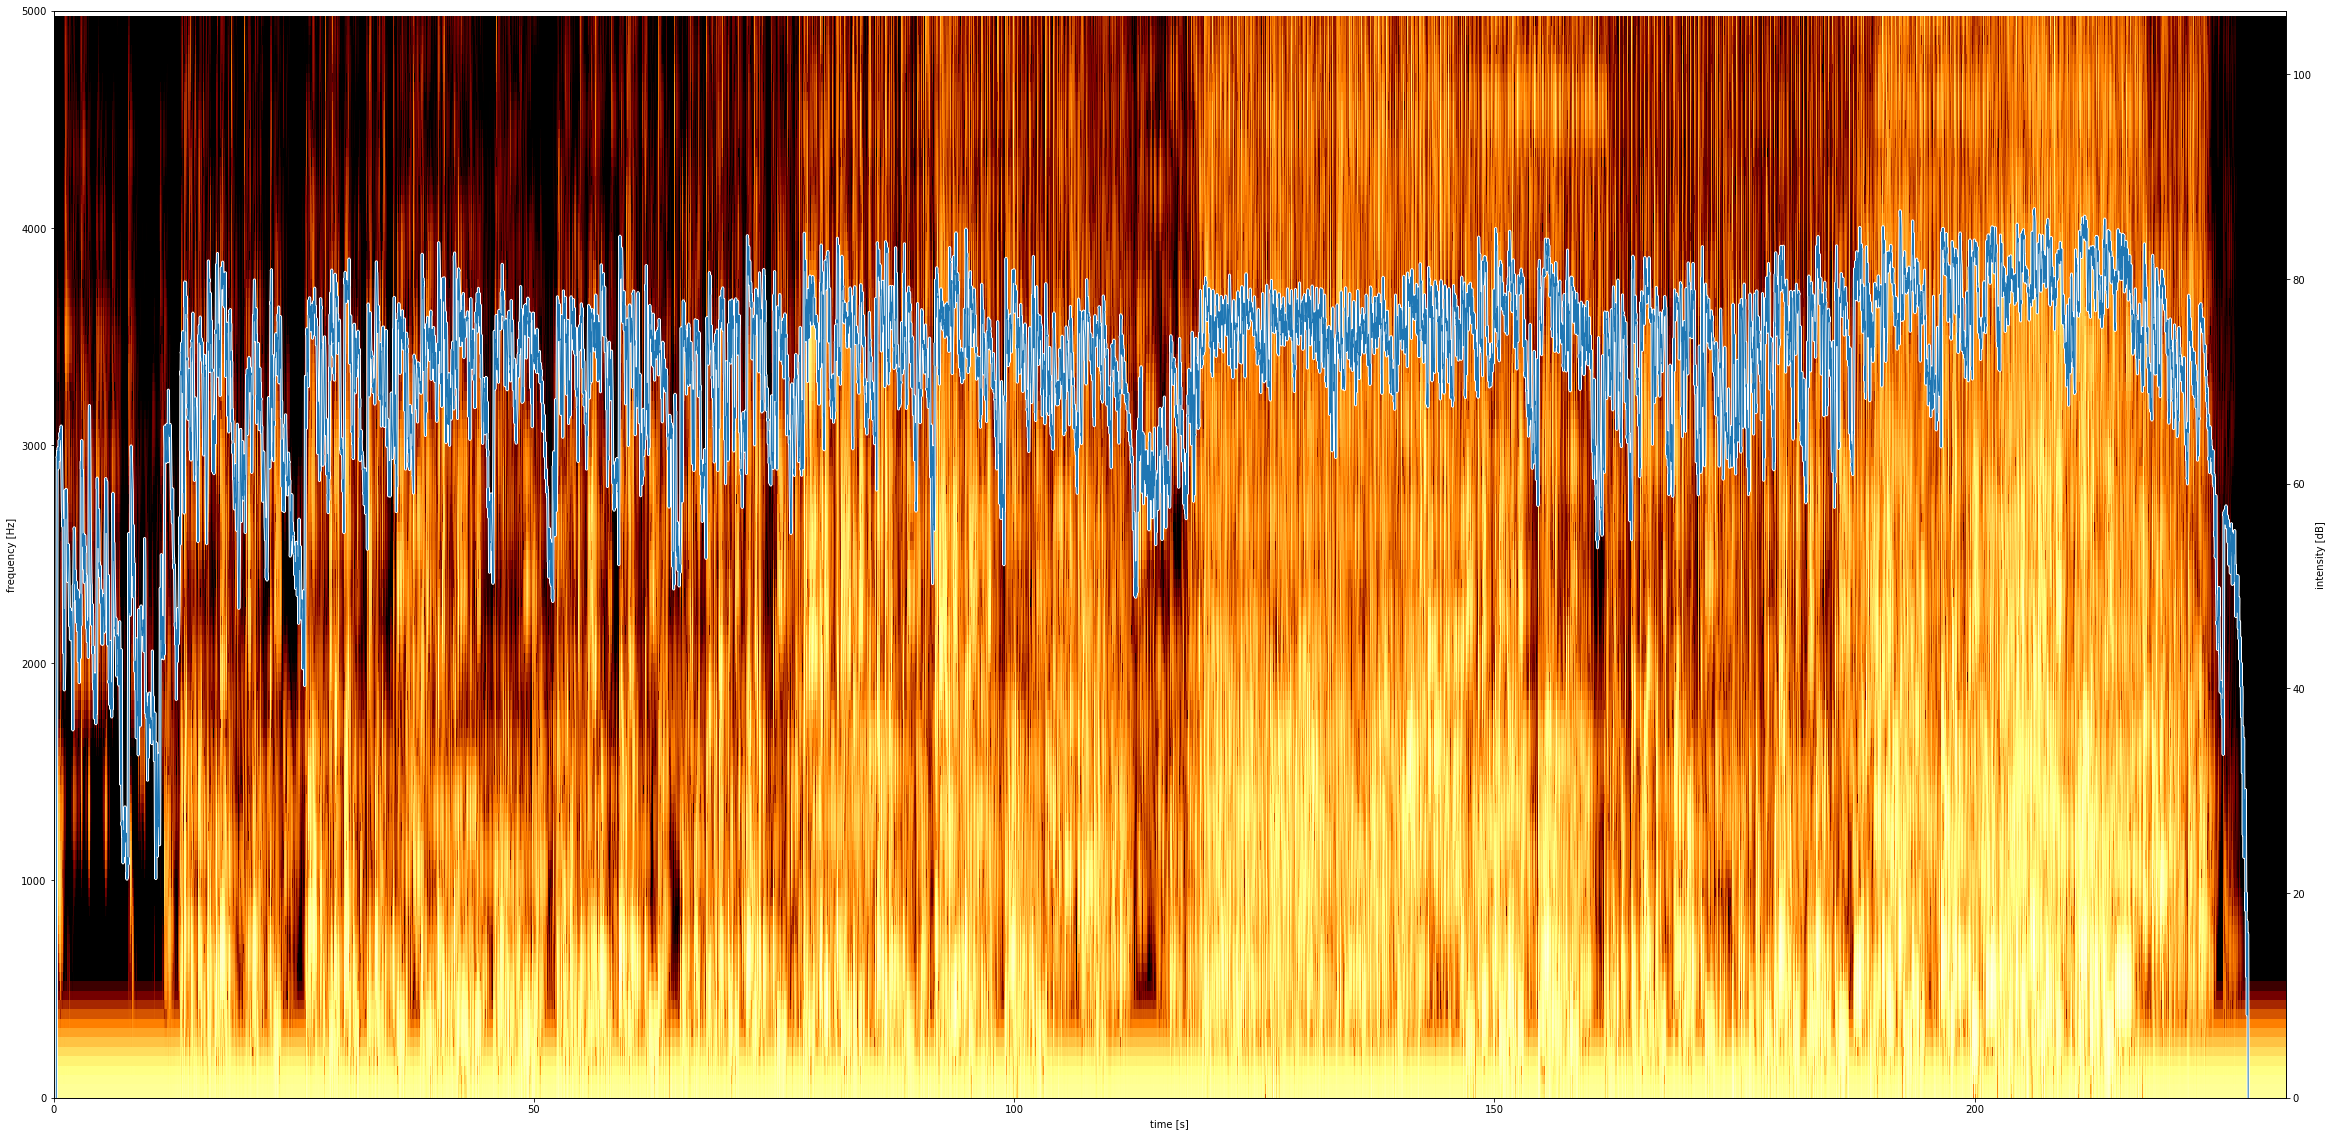

In [8]:
intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show()
# plt.savefig("spectrogram.pdf")

In [ ]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

<Figure size 432x288 with 0 Axes>

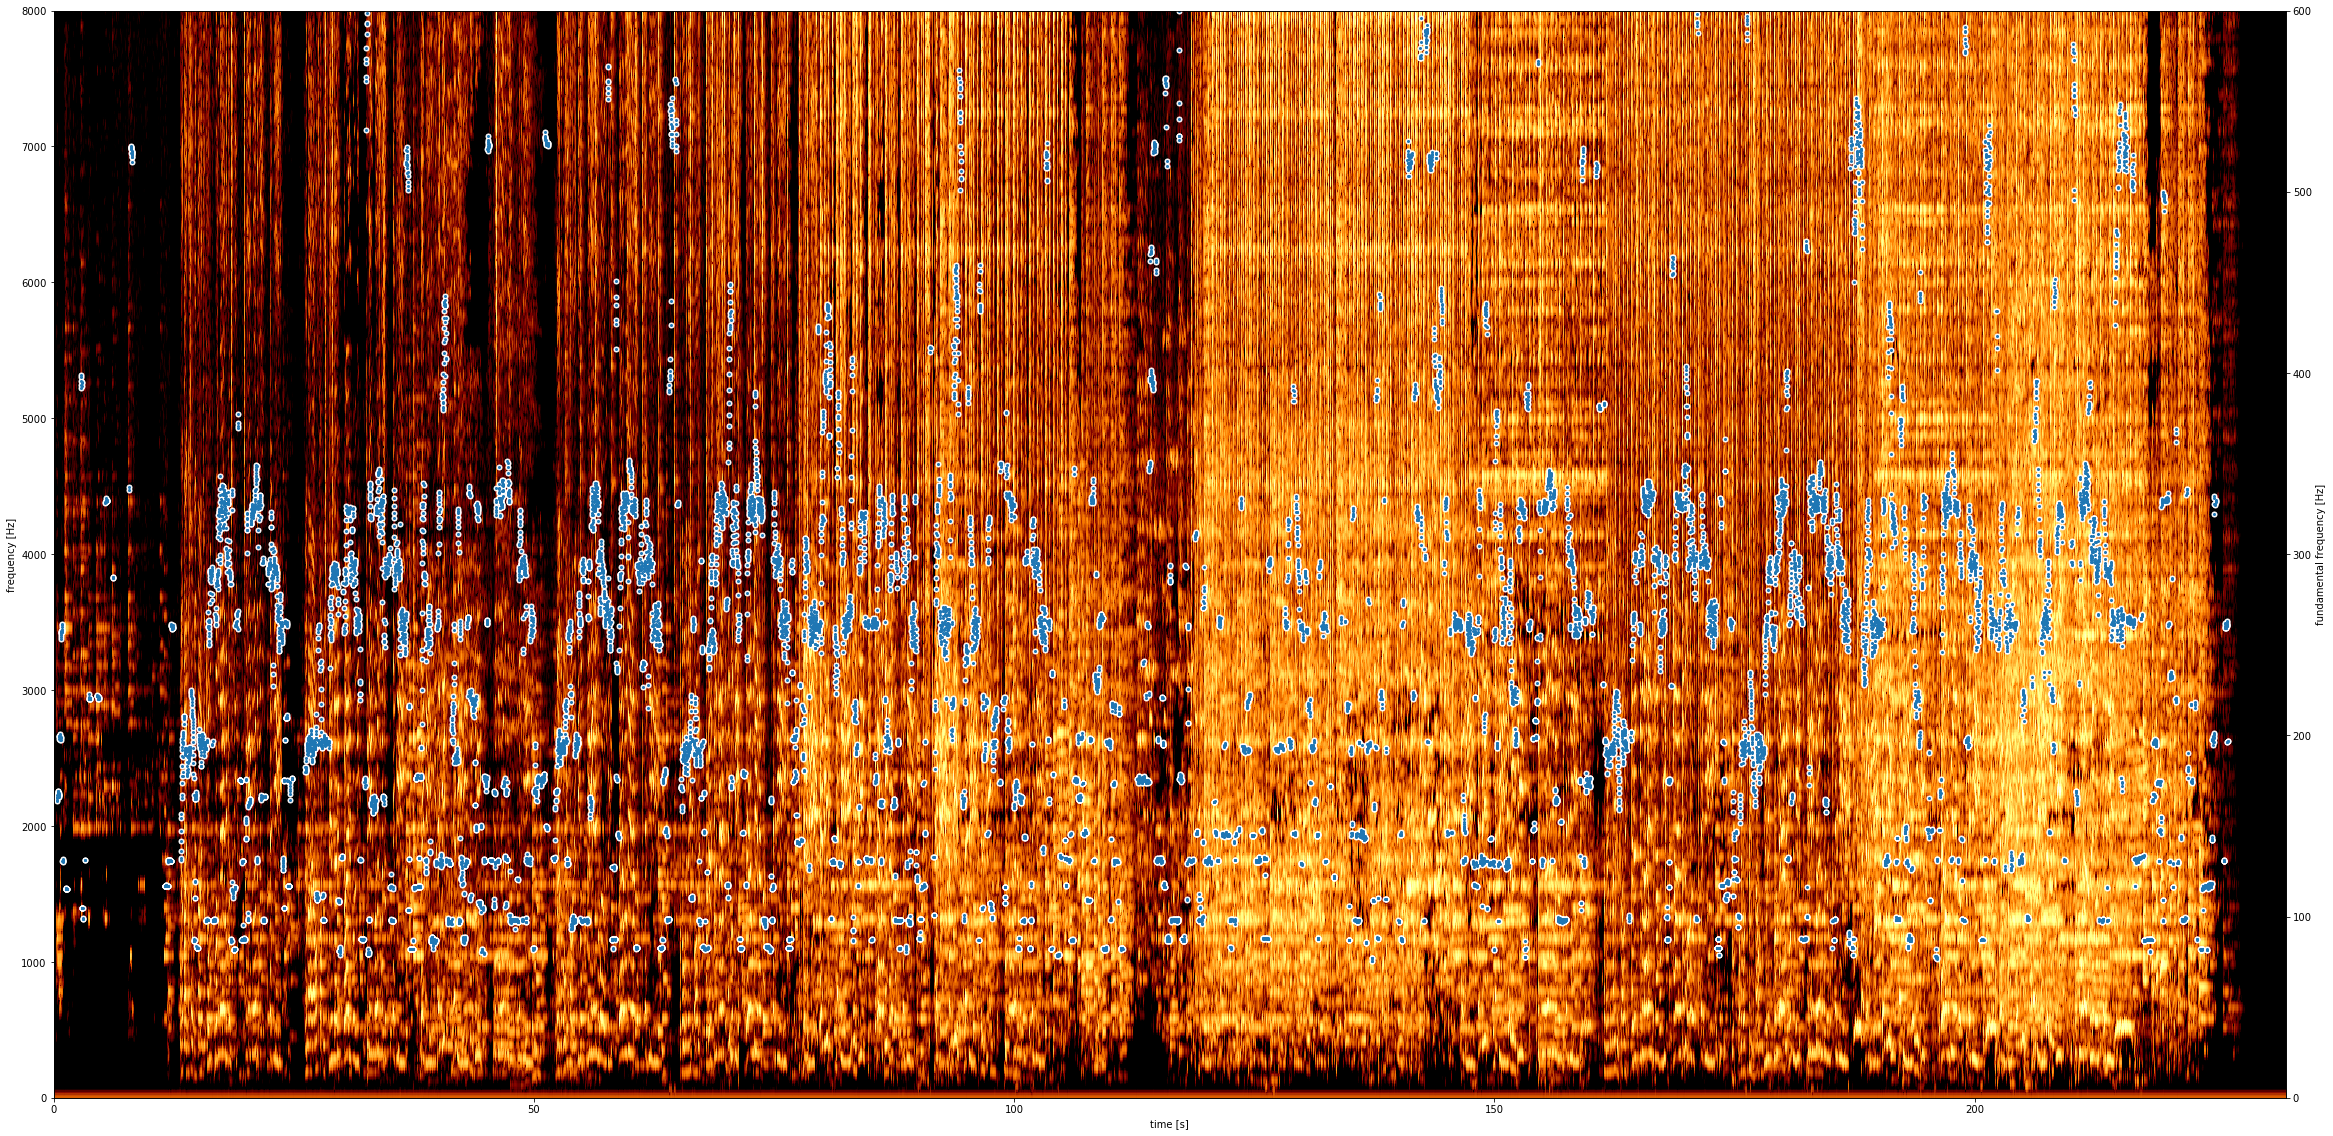

In [9]:
pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

In [16]:
print(len(pitch.selected_array['frequency']))

for p in pitch.selected_array['frequency']:
    if p == 0.0:
        continue
    print(p)

print(pitch)

23234
163.67402523487675
164.51586072606236
165.45045533747054
166.19752023850637
167.26961012216867
167.6776438593164
168.00300266395985
167.16417866795388
167.13154990029915
168.27050959860605
168.98192025351554
169.06682544126318
168.90727502101518
169.18219264457153
168.24909537983046
168.48573026735457
167.48720062231598
167.1974031685157
166.25926930295623
166.50606107967266
167.04879597989893
167.07417472112343
199.02617389053853
198.27355726146968
199.48282916921917
199.60163472461284
199.6464372814569
200.49828172317922
199.56922795569722
199.38986759380222
197.48769424148574
197.77225220442625
198.10345568207626
198.46811792391736
199.21409218496981
198.912832316933
199.30940210672333
198.37844762329766
197.69605856978785
255.47552073516985
252.94645263823398
254.0627412536976
257.62429882897726
257.1331671655159
257.1939898749544
256.6192096976241
256.5578989013785
256.90271994948415
256.9568702949465
258.1020265058999
258.06382493237
258.34396938735745
259.9653523511989
260

247.4095874287057
245.58378104601638
264.7677164908599
297.3935663715097
297.0241080915811
298.7951818716976
296.0180840716355
295.7719692886409
293.8381589221958
293.7098763810179
291.3740832769092
290.0835504990332
288.9730538270123
288.9445083265529
291.95345293650314
292.49493912709397
292.53114337731915
288.35237210813284
289.72939927929195
290.2759379169831
290.94796276972346
294.45655107284927
293.0726685291955
266.3615894665802
271.36981063031544
267.45703453656574
288.7411391010066
99.40893101164167
99.2106069704371
97.07461198835034
97.04886393231322
132.1688191487818
130.9586757637789
130.7484802388507
131.20147650761447
130.56536606360774
130.51110038472356
132.38306017573038
134.28642008045014
129.83741198378112
130.7764716495424
131.6630869643575
132.03673219644128
131.48076492842614
131.5483628941046
131.25039623550256
130.72417016432286
130.70339866871976
130.6510416161107
130.59357454658797
130.5260618158789
130.39191670556644
130.2154586617159
129.7245799284417
130.15

258.534270460621
135.63581692336248
135.9130548429512
135.84709958525843
128.46562349468985
122.19105756819668
121.9713400041069
120.60697256480056
119.9484327194308
119.73491131317788
119.86696506167185
88.07637930450353
87.94920271134926
87.8447311134656
87.96775119055013
87.98213056776484
87.98800678194142
87.83569863024906
87.87541790682451
87.80975696111553
87.85791436167023
98.7716172259455
98.82941629545307
98.80347233716736
98.62041026870395
91.54913230227288
98.54237692975123
98.63031770434159
98.65410195350972
98.54218973832653
98.47993460007916
98.54094793308248
115.08455509207323
115.72038724431033
115.84809675129999
116.91640675412725
116.73789239790052
116.82308881611995
116.69610097064613
116.73153333775689
116.95741345532342
116.94457904807854
116.75569676345405
116.78266302278347
116.9151851433377
117.14756005735158
117.10766468617764
117.0920702118042
116.98351952460786
116.95443132825338
117.0871781660284
117.02961858778541
173.3498967327531
173.15899453763737
174.51

117.0298288879088
117.078533662771
117.17842066283346
117.11734858339236
117.08847830710137
116.99736046864437
117.02170473493624
116.67064465837879
116.37704417585874
116.69664617163393
128.3606661386209
128.43944447195275
128.39032559289308
128.1828541903066
256.4283675128765
256.358903943909
256.776294901485
256.99709367310226
258.7264173031596
262.8308979331507
265.5884941266177
265.0032603510127
262.4206904734285
263.980232736719
264.99653221338707
262.45418247648473
265.153830853343
287.98885588238414
304.4217989586224
313.9545537138078
325.7953778121763
332.58286053281614
335.1910614445908
335.4440037831729
332.98761545251296
331.37951014198956
330.1267666213714
329.8432220530738
331.0320428755408
331.30710501257386
328.3963822598738
325.66940070371095
130.5440547060223
130.15013967767266
129.49051107567556
129.3521337698801
130.54134821804385
132.29619088153495
133.66707857580525
134.19305750009664
132.18549850933312
129.81023026294
129.8379192890728
129.44477960339273
130.3949

263.36192883799936
263.59350286517457
263.19585955877994
262.2109440298253
261.7015910209781
260.2804707850262
258.0085229457551
255.91311793275432
255.1727815138661
251.84757376045144
434.3572125471137
434.3412274565402
420.51307065647694
413.9814248808143
401.5468651981457
247.66577622660404
247.7834600996532
250.29864198927592
251.7503813551401
253.78139445433703
249.3001518704934
257.98563448504495
259.4602408081702
259.5577691358157
262.13992890666856
263.92308447041546
265.41349239340553
267.33860836524553
268.06996652766185
268.9656274488328
267.7442013434871
277.7771344611813
287.0714236672677
289.4454186983674
296.1971912607207
302.4361351297021
307.6547951496611
311.4547231775518
315.14908561659917
319.28437549304226
322.3379850687442
324.72115856174713
325.85842858748595
327.01262999567194
326.924830113546
325.6275154503343
323.7986066657947
327.07995517658134
328.25807080559775
303.3486753209308
297.01870877783796
291.0762160487313
286.7046086752919
285.687322106298
285.381